# HSE 2024: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [16]:
def find_product(a,r,N):
    ## Your code here
    arr_product = 1  # Инициализируем произведение как 1
    current_term = a  # Первый член прогрессии
    
    for i in range(N):
        arr_product *= current_term  # Умножаем произведение на текущий член
        current_term *= r  # Переходим к следующему члену прогрессии
        
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a,r,N))

216


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [13]:
def check_palindrome(N):
    if str(N) == str(N)[::-1]:
        return True
    return False

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [14]:
def find_palindromes(N):
    palindromes = []
    for i in range(N):
        if check_palindrome(1000 + i):
            palindromes.append(1000 + i)
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001]
[1001]
[1001]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [15]:
from random import randint
def find_min(a, b, c):
    ## Your code here
    if a <= b and a <= c:
        return a
    elif b <= a and b <= c:
        return b
    return c

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-24 -46 74 	Minimum: -46
58 -95 10 	Minimum: -95
-66 -21 -3 	Minimum: -66
37 -32 97 	Minimum: -32
34 -10 -54 	Minimum: -54
12 -85 17 	Minimum: -85
-11 21 -63 	Minimum: -63
-1 32 -11 	Minimum: -11
82 6 47 	Minimum: 6
-28 -6 23 	Minimum: -28


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [19]:
my_array = np.random.rand(17)
my_array = my_array / np.sum(my_array) * 6
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [11]:
def calculate_manhattan(a, b):    
    ## Your code here
    distance = np.sum(np.abs(a - b))
    return distance

def calculate_euclidean(a, b):    
    ## Your code here
    distance = np.sqrt(np.sum((a - b) ** 2))
    return distance

def calculate_chebyshev(a, b):    
    ## Your code here
    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):    
    ## Your code here
    # Calculate the dot product between a and b
    dot_product = np.dot(a, b)
    # Calculate the L2 norms (magnitudes) of a and b
    norm_a = np.sqrt(np.sum(a ** 2))
    norm_b = np.sqrt(np.sum(b ** 2))
    # Calculate the cosine similarity
    cosine_similarity = dot_product / (norm_a * norm_b)
    # Cosine distance is 1 - cosine similarity
    distance = 1 - cosine_similarity
    return distance

In [14]:
a = np.random.rand(6)  # Example array
b = np.random.rand(6)  # Another example array
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 1.9881736278031656
Euclidean distance: 0.9322015301009052
Chebyshev distance: 0.5816796503174831
Cosine distance: 0.17521185425501462


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [20]:
def transform(array):
    ## Your code here
    transformed_array = -4 + (array - np.min(array)) * 3 / (np.max(array) - np.min(array))
    
    # Устанавливаем максимальное значение в -1
    transformed_array[np.argmax(transformed_array)] = -1
    # Устанавливаем минимальное значение в -4
    transformed_array[np.argmin(transformed_array)] = -4
    return transformed_array

In [23]:
my_array = random_array = np.random.randint(0, 100, size=76) 
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-1.12371134 -2.48453608 -2.48453608 -1.55670103 -1.71134021 -3.65979381
 -1.55670103 -2.48453608 -3.31958763 -1.15463918 -3.75257732 -1.95876289
 -1.86597938 -2.97938144 -1.58762887 -3.41237113 -3.69072165 -1.15463918
 -1.5257732  -1.71134021 -4.         -2.2371134  -3.59793814 -1.95876289
 -1.83505155 -2.17525773 -3.65979381 -3.93814433 -2.11340206 -2.48453608
 -1.         -2.8556701  -1.40206186 -1.5257732  -3.3814433  -1.80412371
 -3.69072165 -3.96907216 -1.09278351 -1.06185567 -3.04123711 -2.17525773
 -1.55670103 -1.         -1.83505155 -1.         -2.8556701  -2.97938144
 -1.         -3.28865979 -3.69072165 -2.42268041 -1.98969072 -2.57731959
 -3.22680412 -3.78350515 -1.68041237 -3.4742268  -3.93814433 -1.09278351
 -2.73195876 -3.4742268  -1.         -1.03092784 -3.44329897 -2.17525773
 -1.         -3.53608247 -2.91752577 -1.06185567 -2.48453608 -3.28865979
 -3.87628866 -1.64948454 -3.53608247 -1.5257732 ]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [24]:
# Создаем массив формы 8x5 с числами в диапазоне от -7 до 43
my_array = np.random.randint(-7, 44, size=(8, 5))
# Находим индекс столбца, в котором содержится максимальный элемент массива
max_index = np.unravel_index(np.argmax(my_array), my_array.shape)[1]

# Выбираем столбец с максимальным элементом
selected_column = my_array[:, max_index]

print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[31 11 -5 -3 16]
 [ 7 12 -5 32 18]
 [ 5 17 22 -4 15]
 [-5 36 43 25 41]
 [ 0 15 15 -6  6]
 [39 -1 18 10  6]
 [43  7 25 20 25]
 [36 26  1 -7 15]]
Selected column: [-5 -5 22 43 15 18 25  1]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [8]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan        nan 0.46967659 0.8816714  0.59517083 0.71413687
 0.47195458        nan 0.25396438 0.78404944]


In [9]:
def replace_missing(arr):
    ## Your code here
    median = np.nanmedian(arr)
    # Заменяем все пропущенные значения на медиану
    array_without_missing = np.where(np.isnan(arr), median, arr)
    return array_without_missing

In [10]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.59517083 0.59517083 0.46967659 0.8816714  0.59517083 0.71413687
 0.47195458 0.59517083 0.25396438 0.78404944]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [11]:
def mean_channel(X):
    mean_vector = np.mean(X, axis=(0, 1))
    return mean_vector

In [12]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-1.33409611 -1.85125858 -2.23569794]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [15]:
def get_unique_columns(X):
    return np.unique(X, axis=0)

In [16]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique columns:')
get_unique_columns(X)

Matrix:
[[[5 5 4]
  [5 5 5]
  [4 4 4]]

 [[5 5 5]
  [5 5 5]
  [5 4 5]]

 [[4 5 5]
  [4 5 4]
  [5 5 5]]

 [[5 4 5]
  [5 5 5]
  [4 5 5]]

 [[4 4 5]
  [4 5 5]
  [4 4 4]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]]

 [[5 4 5]
  [4 4 4]
  [5 4 4]]

 [[5 5 4]
  [4 5 5]
  [5 4 4]]

 [[4 4 5]
  [4 5 4]
  [5 4 4]]

 [[4 5 4]
  [4 4 5]
  [4 4 4]]

 [[4 5 5]
  [4 4 5]
  [5 5 4]]

 [[4 4 4]
  [5 5 5]
  [5 4 5]]

 [[5 4 4]
  [4 4 4]
  [4 5 5]]

 [[5 5 4]
  [5 5 4]
  [5 4 4]]

 [[4 4 5]
  [4 5 5]
  [4 4 5]]

 [[5 4 5]
  [5 4 4]
  [4 4 4]]

 [[4 4 4]
  [4 5 5]
  [4 5 5]]

 [[4 5 4]
  [4 5 5]
  [4 4 5]]

 [[4 5 5]
  [4 4 4]
  [5 4 5]]]
Unique columns:


array([[[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 5, 5],
        [4, 5, 5]],

       [[4, 4, 4],
        [5, 5, 5],
        [5, 4, 5]],

       [[4, 4, 5],
        [4, 5, 4],
        [5, 4, 4]],

       [[4, 4, 5],
        [4, 5, 5],
        [4, 4, 4]],

       [[4, 4, 5],
        [4, 5, 5],
        [4, 4, 5]],

       [[4, 5, 4],
        [4, 4, 5],
        [4, 4, 4]],

       [[4, 5, 4],
        [4, 5, 5],
        [4, 4, 5]],

       [[4, 5, 5],
        [4, 4, 4],
        [5, 4, 5]],

       [[4, 5, 5],
        [4, 4, 5],
        [5, 5, 4]],

       [[4, 5, 5],
        [4, 5, 4],
        [5, 5, 5]],

       [[5, 4, 4],
        [4, 4, 4],
        [4, 5, 5]],

       [[5, 4, 5],
        [4, 4, 4],
        [5, 4, 4]],

       [[5, 4, 5],
        [5, 4, 4],
        [4, 4, 4]],

       [[5, 4, 5],
        [5, 5, 5],
        [4, 5, 5]],

       [[5, 5, 4],
        [4, 5, 5],
        [5, 4, 4]],

       [[5, 5, 4],
        [5, 5, 4],
        [5, 4, 4]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [17]:
dataset = pd.read_csv('titanic_hw.csv')

# Display the first 5 rows of the dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [42]:
## Are there any missing values? In what columns?
## What is the percentage of survived passengers? Are the classes balanced?


# Check for missing values in the dataset
missing_values = dataset.isnull().sum()

# Calculate the percentage of survived passengers
total_passengers = dataset.shape[0]
survived_passengers = dataset['Survived'].sum()
survival_percentage = (survived_passengers / total_passengers) * 100

# Check if the classes (Pclass) are balanced
class_distribution = dataset['Pclass'].value_counts(normalize=True) * 100

print("missing values", missing_values)
print(f"percentage: {survival_percentage}%")
print("The distribution of passengers across the different classes (Pclass) is as follows:")
print(class_distribution)
print("The classes are not perfectly balanced, with a higher proportion of passengers in 3rd class compared to the 1st and 2nd classes.")

missing values PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
percentage: 38.38383838383838%
The distribution of passengers across the different classes (Pclass) is as follows:
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64
The classes are not perfectly balanced, with a higher proportion of passengers in 3rd class compared to the 1st and 2nd classes.


In [34]:
#Were there more males or females?


gender_distribution = dataset['Sex'].value_counts()

print(gender_distribution)

print("There were more males (577) than females (314) in the dataset")

male      577
female    314
Name: Sex, dtype: int64
There were more males (577) than females (314) in the dataset


In [36]:
#What what the least popular port of embarkation?

# Count the occurrences of each port of embarkation
embarkation_distribution = dataset['Embarked'].value_counts()

# Find the least popular port of embarkation
least_popular_port = embarkation_distribution.idxmin()

print(embarkation_distribution, least_popular_port)

print("The least popular port of embarkation was 'Q' (Queenstown), with 77 passengers embarking from there.")

S    644
C    168
Q     77
Name: Embarked, dtype: int64 Q
The least popular port of embarkation was 'Q' (Queenstown), with 77 passengers embarking from there.


In [41]:
# How many classes (pclass) were there on Tinanic?
# What is the overall average ticket fare? And for every class?



# Count the number of unique classes (Pclass) in the dataset
num_classes = dataset['Pclass'].nunique()

# Calculate the overall average ticket fare
overall_avg_fare = dataset['Fare'].mean()

# Calculate the average ticket fare for each class
avg_fare_by_class = dataset.groupby('Pclass')['Fare'].mean()

print("There were 3 classes (Pclass) on the Titanic.", num_classes)
print("The overall average ticket fare was", overall_avg_fare)
print("Average Ticket Fare by Class: ",avg_fare_by_class)

There were 3 classes (Pclass) on the Titanic. 3
The overall average ticket fare was 32.204207968574636
Average Ticket Fare by Class:  Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

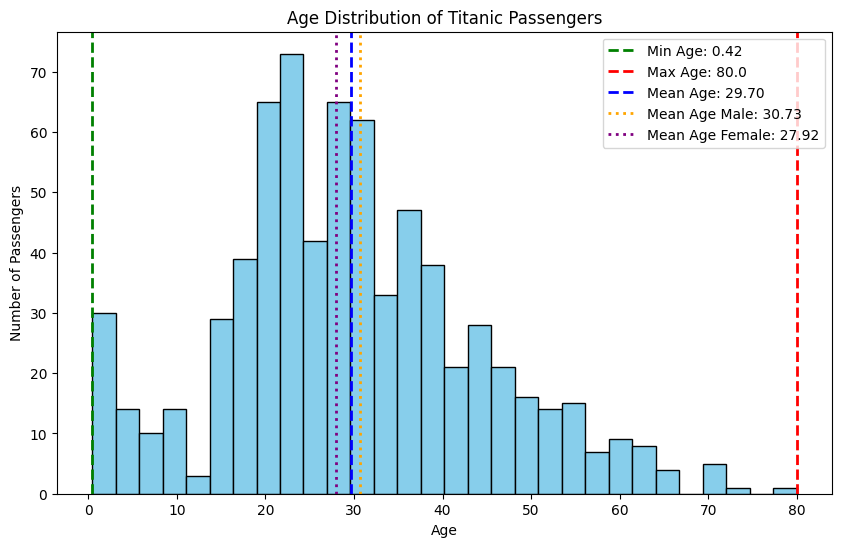

In [43]:
## Your code here
# Age statistics
min_age = dataset['Age'].min()
max_age = dataset['Age'].max()
mean_age = dataset['Age'].mean()
mean_age_male = dataset[dataset['Sex'] == 'male']['Age'].mean()
mean_age_female = dataset[dataset['Sex'] == 'female']['Age'].mean()

# Plot the age distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(dataset['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')

# Mark the minimal, maximal, and mean ages
plt.axvline(min_age, color='green', linestyle='dashed', linewidth=2, label=f'Min Age: {min_age}')
plt.axvline(max_age, color='red', linestyle='dashed', linewidth=2, label=f'Max Age: {max_age}')
plt.axvline(mean_age, color='blue', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
plt.axvline(mean_age_male, color='orange', linestyle='dotted', linewidth=2, label=f'Mean Age Male: {mean_age_male:.2f}')
plt.axvline(mean_age_female, color='purple', linestyle='dotted', linewidth=2, label=f'Mean Age Female: {mean_age_female:.2f}')

# Add labels and legend
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

plt.show()

Minimum and Maximum Ages:

The minimum age of passengers is 0.42 (likely infants).
The maximum age is 80.0.



Mean Age:
The overall mean age is approximately 29.7 years.
The mean age of males is about 30.73 years.
The mean age of females is about 27.92 years.



The distribution of age shows a peak around the age of 20-30, indicating that a significant portion of the passengers were young adults.
There are relatively fewer older passengers (over 50 years), and a small number of very young children.
The mean age for males is slightly higher than that for females, but the difference is not very large.
This visualization helps illustrate the age composition of the Titanic passengers, showing that most were young adults, with a smaller proportion of older and very young passengers. ​

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [45]:
# Your code here
# Extract titles from the 'Name' column
dataset['Title'] = dataset['Name'].str.extract(r'([A-Za-z]+)\.')

# Count unique titles
unique_titles = dataset['Title'].nunique()

# Count passengers with each title
title_counts = dataset['Title'].value_counts()

# Find the most popular man's and woman's titles
most_popular_male_title = dataset[dataset['Sex'] == 'male']['Title'].mode()[0]
most_popular_female_title = dataset[dataset['Sex'] == 'female']['Title'].mode()[0]

unique_titles, title_counts, most_popular_male_title, most_popular_female_title

(17,
 Mr          517
 Miss        182
 Mrs         125
 Master       40
 Dr            7
 Rev           6
 Mlle          2
 Major         2
 Col           2
 Countess      1
 Capt          1
 Ms            1
 Sir           1
 Lady          1
 Mme           1
 Don           1
 Jonkheer      1
 Name: Title, dtype: int64,
 'Mr',
 'Miss')

Most Popular Man's Title: The most popular title among men is Mr.

Most Popular Woman's Title: The most popular title among women is Miss.

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



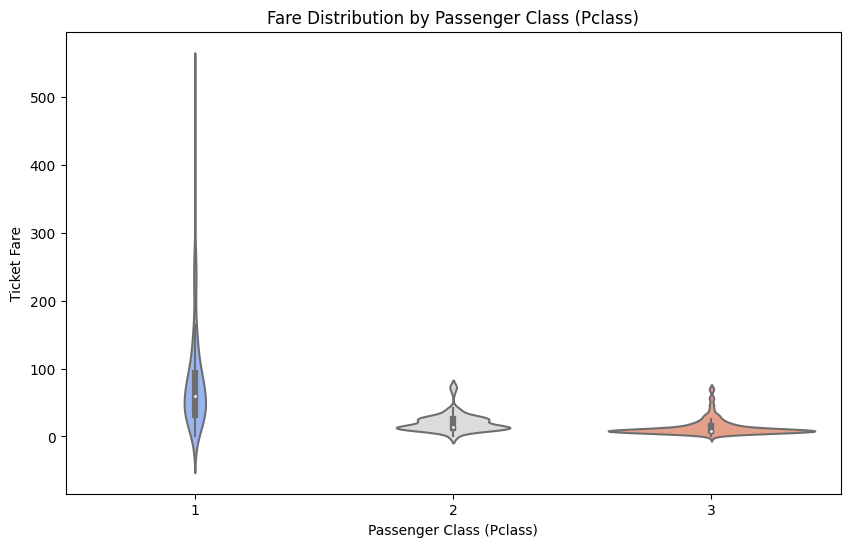

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [49]:
mean_fare_by_pclass = dataset.groupby('Pclass')['Fare'].mean()

# Create a violin plot to visualize the distribution of ticket prices by Pclass
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Fare', data=dataset, palette='coolwarm')
plt.title('Fare Distribution by Passenger Class (Pclass)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Ticket Fare')
plt.show()

# Output the mean ticket price for each class
mean_fare_by_pclass

I chose the violin plot because it effectively combines the features of a boxplot and a density plot. It not only shows the distribution of ticket prices for each class (like a boxplot would), but also the density and range of fares. This allows for a clear visualization of the differences in fare distributions across passenger classes, making it easy to see both the median fares and the spread (variability) within each class.

Mean Ticket Price for Each Class:

1st Class: 84.15
2nd Class: 20.66
3rd Class: 13.68
Plot Insights:

The violin plot shows a clear trend: passengers in 1st class paid significantly higher fares than those in 2nd and 3rd classes.

The distribution of fares for 1st class is wider, indicating a larger variation in prices (due to different cabin types and luxury accommodations).

The 2nd and 3rd classes have more compressed fare ranges, with the 3rd class having the lowest and narrowest fare distribution.

Conclusion:
There is a strong correlation between passenger class (Pclass) and ticket price. As expected, passengers in higher classes paid more, with 1st class having both the highest average and the widest distribution of fares, while 3rd class fares were significantly lower and more uniform.

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

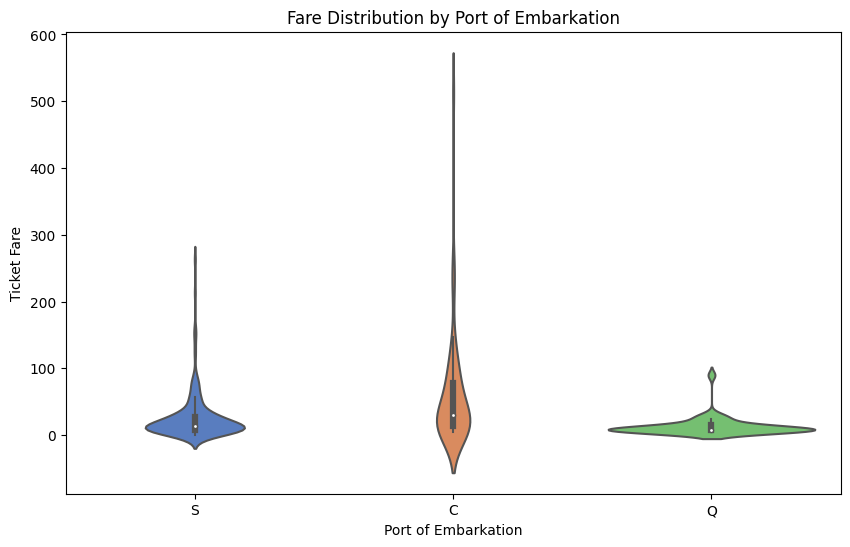

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [47]:
## You code here
# Calculate the mean fare for each port of embarkation
mean_fare_by_port = dataset.groupby('Embarked')['Fare'].mean()

# Create a violin plot to visualize the distribution of fare by port of embarkation
plt.figure(figsize=(10, 6))
sns.violinplot(x='Embarked', y='Fare', data=dataset, palette='muted')
plt.title('Fare Distribution by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Ticket Fare')
plt.show()

# Display the mean ticket prices by port
mean_fare_by_port

Since Embarked is a categorical variable and Fare is a continuous variable, we cannot directly compute a correlation in the typical numerical sense. However, we can explore the relationship between the embarkation port and ticket prices by examining the distribution of fares across different ports.

Here are a few ways to investigate this relationship:

Mean Fare by Port: As we calculated earlier, passengers embarking from different ports (Cherbourg, Queenstown, Southampton) paid different average fares.

Violin or Box Plots: These visualizations showed how ticket prices varied depending on the embarkation port, with passengers from Cherbourg paying significantly higher fares on average than those from Southampton or Queenstown.

Summary:
While there's no direct numerical correlation between Embarked and Fare, there is a clear association: passengers from Cherbourg paid higher fares, while those from Queenstown paid the lowest. The port of embarkation is likely tied to socioeconomic status and cabin class, affecting fare pricing trends.

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

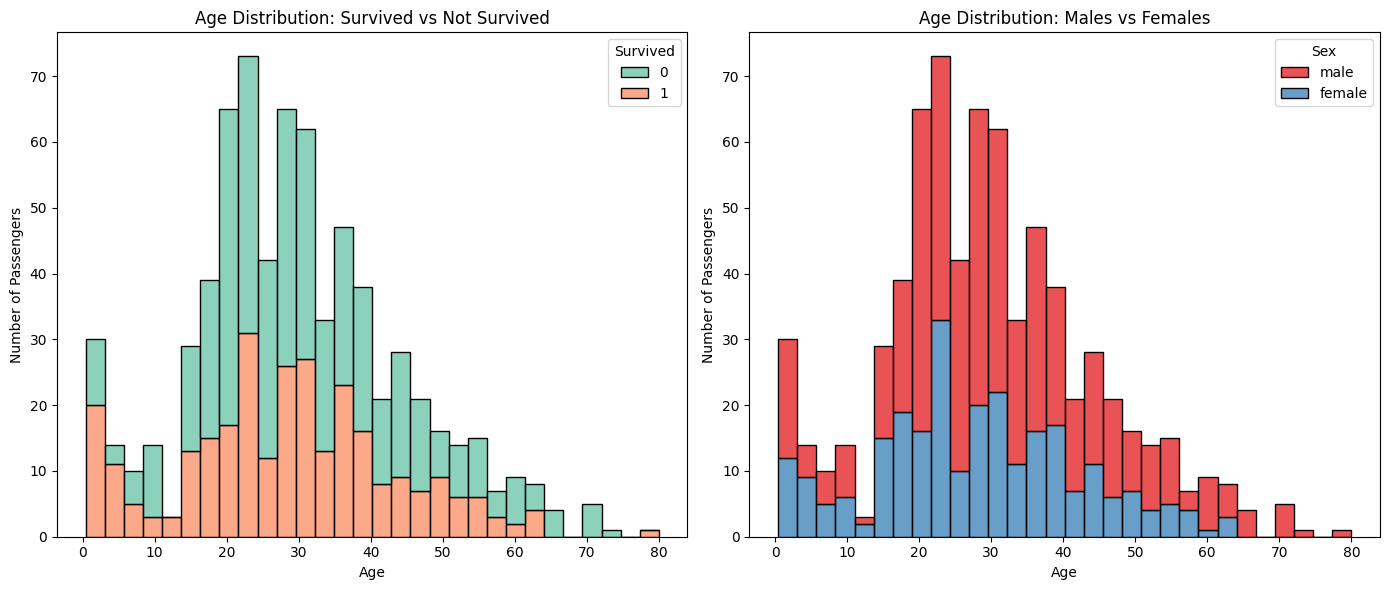

(Survived
 0    30.626179
 1    28.343690
 Name: Age, dtype: float64,
 Sex
 female    27.915709
 male      30.726645
 Name: Age, dtype: float64,
 Pclass
 1    38.233441
 2    29.877630
 3    25.140620
 Name: Age, dtype: float64)

In [54]:
## You code here
# Calculate mean age for survived and not survived passengers
mean_age_survived = dataset.groupby('Survived')['Age'].mean()

# Calculate mean age for males and females separately
mean_age_sex = dataset.groupby('Sex')['Age'].mean()

# Create age distribution visualizations for survived and not survived passengers
plt.figure(figsize=(14, 6))

# Subplot for survived vs not survived age distribution
plt.subplot(1, 2, 1)
sns.histplot(data=dataset, x='Age', hue='Survived', multiple='stack', bins=30, palette='Set2')
plt.title('Age Distribution: Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

# Subplot for males vs females age distribution
plt.subplot(1, 2, 2)
sns.histplot(data=dataset, x='Age', hue='Sex', multiple='stack', bins=30, palette='Set1')
plt.title('Age Distribution: Males vs Females')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

plt.tight_layout()
plt.show()

# Calculate mean age for each passenger class
mean_age_by_class = dataset.groupby('Pclass')['Age'].mean()

# Display results
mean_age_survived, mean_age_sex, mean_age_by_class

Mean Age for Survived and Not Survived Passengers:

Survived: Average age is 28.34 years.
Not Survived: Average age is 30.63 years.
The mean age of passengers who did not survive is slightly higher than those who survived.

Mean Age for Males and Females:

Females: Average age is 27.92 years.
Males: Average age is 30.73 years.
Males have a slightly higher average age compared to females.

Mean Age for Each Passenger Class:

1st Class: Average age is 38.23 years.
2nd Class: Average age is 29.88 years.
3rd Class: Average age is 25.14 years.
Passengers in 1st class tend to be older, with the average age decreasing in lower classes.

Visualization Insights:
The age distribution of survived vs. not survived passengers shows a concentration of younger passengers among survivors.
The age distribution for males and females indicates that more males are spread across different age ranges, while females show a stronger peak around younger ages.
Conclusion:
Older passengers were more likely to be in higher classes, particularly 1st class.
Younger passengers, especially in the 3rd class, had a higher survival rate.
Age and gender played a role in survival rates, with younger and female passengers having better survival outcomes overall. 